### Импортирование необходимых библиотек

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator

In [15]:
import os

In [16]:
train = "C:/Users/kocor/train"
test = "C:/Users/kocor/test"
val = "C:/Users/kocor/val"

In [38]:
# Установите размер изображения
img_width, img_height = 150, 150
batch_size=32

In [39]:
# Определите генератор изображений
train_datagenerator = ImageDataGenerator(rescale=1./255)
val_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

In [40]:
import tensorflow as tf
datagenerator = ImageDataGenerator(rescale=1. / 255)
train_generator = datagenerator.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=32, class_mode='binary')

val_generator = datagenerator.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=32, class_mode='binary')

test_generator = datagenerator.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=32, class_mode='binary')

# Нормализация изображений
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [41]:
nb_train_samples = 20000 
nb_val_samples = 2490 
nb_test_samples = 2500

In [42]:
# Просмотреть примеры изображенийimport matplotlib.pyplot as plt

def plot_images(generator):
    X, y = generator.next()
    for i in range(0, 9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
    plt.show()

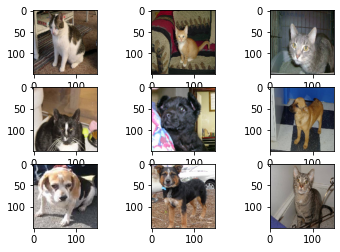

In [43]:
# Отображение образцов изображений из набора данных "train"
plot_images(train_generator)

In [48]:
# Построить модель
model = Sequential([normalization_layer, Flatten(input_shape=(img_height, img_width, 3)),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [53]:
# Скомпилировать модель
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
# Обучение модели
model.fit(train_generator, validation_data=val_generator, validation_steps=nb_val_samples // batch_size, epochs=10)

Epoch 1/10
625/625 [==============================] - 86s 136ms/step - loss: 0.6837 - accuracy: 0.5532 - val_loss: 0.6767 - val_accuracy: 0.5755
Epoch 2/10
625/625 [==============================] - 91s 145ms/step - loss: 0.6584 - accuracy: 0.6114 - val_loss: 0.6529 - val_accuracy: 0.6128
Epoch 3/10
625/625 [==============================] - 86s 137ms/step - loss: 0.6476 - accuracy: 0.6166 - val_loss: 0.6515 - val_accuracy: 0.6181
Epoch 4/10
625/625 [==============================] - 87s 139ms/step - loss: 0.6413 - accuracy: 0.6284 - val_loss: 0.6514 - val_accuracy: 0.6181
Epoch 5/10
625/625 [==============================] - 85s 135ms/step - loss: 0.6341 - accuracy: 0.6367 - val_loss: 0.6466 - val_accuracy: 0.6209
Epoch 6/10
625/625 [==============================] - 78s 125ms/step - loss: 0.6294 - accuracy: 0.6424 - val_loss: 0.6470 - val_accuracy: 0.6303
Epoch 7/10
625/625 [==============================] - 77s 124ms/step - loss: 0.6199 - accuracy: 0.6510 - val_loss: 0.6544 - val_ac

In [75]:
loss = [0.6837, 0.6584, 0.6476, 0.6413, 0.6341, 0.6294, 0.6199, 0.6154, 0.6056, 0.6032]
val_loss = [0.6767, 0.6529, 0.6515, 0.6514, 0.6466, 0.6470, 0.6544, 0.6366, 0.6420, 0.6355]
acc = [0.5532, 0.6114, 0.6166, 0.6284, 0.6367, 0.6424, 0.6510, 0.6593, 0.6651, 0.6691]
val_acc = [0.5755, 0.6128, 0.6181, 0.6181, 0.6209, 0.6303, 0.6226, 0.6372, 0.6278, 0.6465]

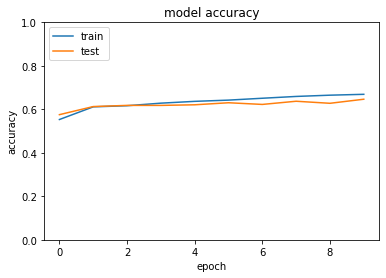

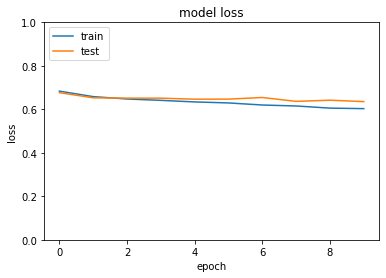

In [76]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# обобщить историю потерь

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# Оценить модель на "тестовом" множестве
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

79/79 [==============================] - 6s 81ms/step - loss: 0.6269 - accuracy: 0.6392
Test accuracy: 0.63919997215271


In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [57]:
# Составление и обучение модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=test_generator, validation_steps=nb_val_samples // batch_size, epochs=10)

Epoch 1/10
625/625 [==============================] - 314s 499ms/step - loss: 0.6409 - accuracy: 0.6232 - val_loss: 0.5036 - val_accuracy: 0.7512
Epoch 2/10
625/625 [==============================] - 333s 532ms/step - loss: 0.4816 - accuracy: 0.7686 - val_loss: 0.4269 - val_accuracy: 0.8036
Epoch 3/10
625/625 [==============================] - 358s 572ms/step - loss: 0.3764 - accuracy: 0.8328 - val_loss: 0.3439 - val_accuracy: 0.8421
Epoch 4/10
625/625 [==============================] - 352s 562ms/step - loss: 0.3099 - accuracy: 0.8687 - val_loss: 0.3136 - val_accuracy: 0.8592
Epoch 5/10
625/625 [==============================] - 350s 559ms/step - loss: 0.2499 - accuracy: 0.8949 - val_loss: 0.3309 - val_accuracy: 0.8620
Epoch 6/10
625/625 [==============================] - 338s 540ms/step - loss: 0.2010 - accuracy: 0.9158 - val_loss: 0.2835 - val_accuracy: 0.8856
Epoch 7/10
625/625 [==============================] - 339s 543ms/step - loss: 0.1518 - accuracy: 0.9396 - val_loss: 0.3028 -

In [59]:
# Оценить модель на тестовом наборе

test_loss, test_acc = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print('Test accuracy:', test_acc)

C:\Users\kocor\AppData\Local\Temp\ipykernel_24372\1816364639.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Test accuracy: 0.8794070482254028


In [60]:
loss = [0.6409, 0.4816, 0.3764, 0.3099, 0.2499, 0.2010, 0.1518, 0.1145, 0.096, 0.0734]
val_loss = [0.5036, 0.4269, 0.3439, 0.3136, 0.3309, 0.2835, 0.3028, 0.3523, 0.4056, 0.4139]
acc = [0.6232, 0.7686, 0.8328, 0.8697, 0.8949, 0.9158, 0.9396, 0.9550, 0.9651, 0.9714]
val_acc = [0.7512, 0.8036, 0.8421, 0.8592, 0.8620, 0.8856, 0.8904, 0.888, 0.8827, 0.8795]

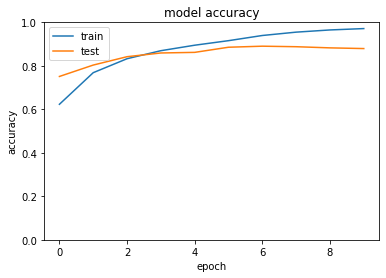

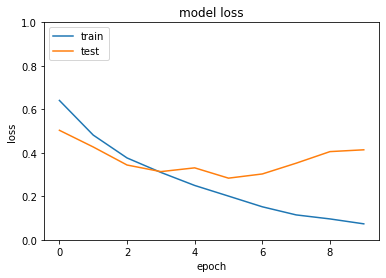

In [61]:
import matplotlib.pyplot as plt

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# обобщить историю по потерям
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
# Загрузка предварительно обученных моделей

from keras.applications import VGG19, ResNet50


vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Заморозить слои свертки для обеих моделей

for layer in vgg_model.layers:
    layer.trainable = False

for layer in resnet_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 57s 1us/step


In [63]:
# Добавьте полностью связанные слои для обеих моделей

model_vgg = Sequential()
model_vgg.add(vgg_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(1, activation='sigmoid'))
model_resnet = Sequential()
model_resnet.add(resnet_model)
model_resnet.add(Flatten())
model_resnet.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model_resnet.add(Dense(1, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [67]:
# Обучение моделей на обучающих и проверочных данных

model_vgg.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model_vgg.fit(train_generator, validation_data=val_generator, validation_steps=nb_val_samples // batch_size, epochs=10)

Epoch 1/10
625/625 [==============================] - 1329s 2s/step - loss: 0.2595 - accuracy: 0.8936 - val_loss: 0.2702 - val_accuracy: 0.8872
Epoch 2/10
625/625 [==============================] - 1240s 2s/step - loss: 0.2444 - accuracy: 0.9010 - val_loss: 0.2614 - val_accuracy: 0.8916
Epoch 3/10
625/625 [==============================] - 1214s 2s/step - loss: 0.2337 - accuracy: 0.9061 - val_loss: 0.2557 - val_accuracy: 0.8957
Epoch 4/10
625/625 [==============================] - 1230s 2s/step - loss: 0.2252 - accuracy: 0.9100 - val_loss: 0.2531 - val_accuracy: 0.8929
Epoch 5/10
625/625 [==============================] - 1227s 2s/step - loss: 0.2182 - accuracy: 0.9143 - val_loss: 0.2508 - val_accuracy: 0.8965
Epoch 6/10
625/625 [==============================] - 1228s 2s/step - loss: 0.2119 - accuracy: 0.9156 - val_loss: 0.2474 - val_accuracy: 0.8998
Epoch 7/10
625/625 [==============================] - 1237s 2s/step - loss: 0.2063 - accuracy: 0.9183 - val_loss: 0.2453 - val_accuracy:

In [73]:
loss = [0.2595, 0.2444, 0.2337, 0.2252, 0.2182, 0.2119, 0.2063, 0.2010, 0.1965, 0.1922]
val_loss = [0.2702, 0.2614, 0.2557, 0.2531, 0.2508, 0.2474, 0.2453, 0.2423, 0.2414, 0.2435]
acc = [0.8936, 0.9010, 0.9061, 0.9100, 0.9143, 0.9156, 0.9183, 0.9209, 0.9237, 0.9264]
val_acc = [0.8872, 0.8916, 0.8957, 0.8929, 0.8965, 0.8998, 0.8994, 0.9006, 0.9002, 0.9010]

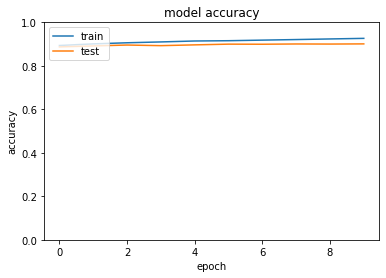

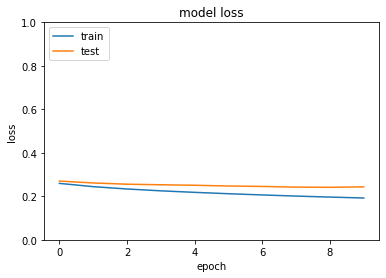

In [74]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# обобщить историю потерь

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
model_resnet.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model_resnet.fit(train_generator, validation_data=val_generator, validation_steps=nb_val_samples // batch_size, epochs=10)

Epoch 1/10
625/625 [==============================] - 627s 994ms/step - loss: 0.6560 - accuracy: 0.6093 - val_loss: 0.6334 - val_accuracy: 0.6457
Epoch 2/10
625/625 [==============================] - 622s 996ms/step - loss: 0.6244 - accuracy: 0.6561 - val_loss: 0.6118 - val_accuracy: 0.6798
Epoch 3/10
625/625 [==============================] - 645s 1s/step - loss: 0.6076 - accuracy: 0.6782 - val_loss: 0.5979 - val_accuracy: 0.6891
Epoch 4/10
625/625 [==============================] - 572s 916ms/step - loss: 0.5956 - accuracy: 0.6854 - val_loss: 0.5905 - val_accuracy: 0.6956
Epoch 5/10
625/625 [==============================] - 595s 952ms/step - loss: 0.5868 - accuracy: 0.6937 - val_loss: 0.5813 - val_accuracy: 0.6972
Epoch 6/10
625/625 [==============================] - 575s 920ms/step - loss: 0.5806 - accuracy: 0.6987 - val_loss: 0.5848 - val_accuracy: 0.6976
Epoch 7/10
625/625 [==============================] - 543s 869ms/step - loss: 0.5724 - accuracy: 0.7055 - val_loss: 0.5708 - va

In [77]:
loss = [0.6560, 0.6244, 0.6076, 0.5956, 0.5868, 0.5806, 0.5724, 0.5683, 0.5649, 0.5592]
val_loss = [0.6334, 0.6118, 0.5979, 0.5905, 0.5813, 0.5848, 0.5708, 0.5694, 0.5642, 0.5601,]
acc = [0.6093, 0.6561, 0.6782, 0.6854, 0.6937, 0.6987, 0.7055, 0.7089, 0.7141, 0.6691]
val_acc = [0.6457, 0.6798, 0.6891, 0.6956, 0.6972, 0.6976, 0.7114, 0.7135, 0.7143, 0.7212]

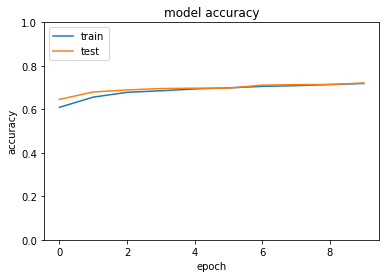

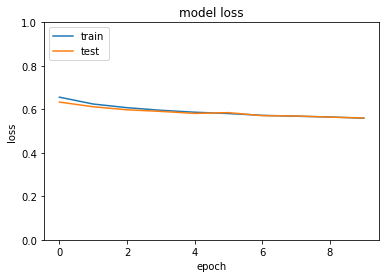

In [78]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# обобщить историю потерь

plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
# Оценка производительности на тестовых данных

loss_vgg, accuracy_vgg = model_vgg.evaluate(test_generator)
loss_resnet, accuracy_resnet = model_resnet.evaluate(test_generator)

print("Производительность VGG19 :")
print("Loss :", loss_vgg)
print("Accuracy :", accuracy_vgg)

print("Производительность ResNet50 :")
print("Loss :", loss_resnet)
print("Accuracy :", accuracy_resnet)

79/79 [==============================] - 57s 709ms/step - loss: 0.5294 - accuracy: 0.7436
Производительность VGG19 :
Loss : 0.23972497880458832
Accuracy : 0.8960000276565552
Производительность ResNet50 :
Loss : 0.5293512344360352
Accuracy : 0.7436000108718872


Epoch 1/15
625/625 [==============================] - 1053s 2s/step - loss: 0.1883 - accuracy: 0.9272 - val_loss: 0.2403 - val_accuracy: 0.9036
Epoch 2/15
625/625 [==============================] - 1099s 2s/step - loss: 0.1847 - accuracy: 0.9276 - val_loss: 0.2388 - val_accuracy: 0.9020
Epoch 3/15
625/625 [==============================] - 1104s 2s/step - loss: 0.1811 - accuracy: 0.9301 - val_loss: 0.2403 - val_accuracy: 0.9004
Epoch 4/15
625/625 [==============================] - 1101s 2s/step - loss: 0.1784 - accuracy: 0.9325 - val_loss: 0.2391 - val_accuracy: 0.9028
Epoch 5/15
625/625 [==============================] - 1108s 2s/step - loss: 0.1746 - accuracy: 0.9342 - val_loss: 0.2377 - val_accuracy: 0.9052
Epoch 6/15
625/625 [==============================] - 1099s 2s/step - loss: 0.1722 - accuracy: 0.9360 - val_loss: 0.2376 - val_accuracy: 0.9044
Epoch 7/15
625/625 [==============================] - 1107s 2s/step - loss: 0.1688 - accuracy: 0.9361 - val_loss: 0.2376 - val_accuracy:

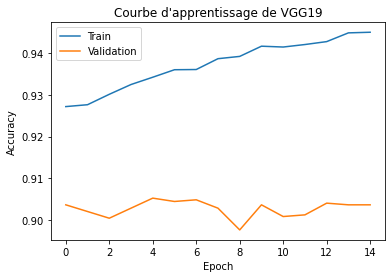

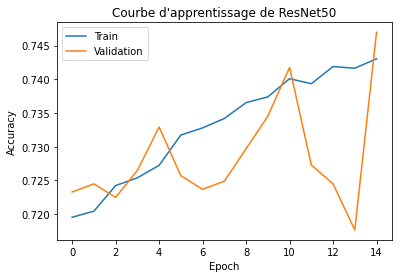

In [71]:
# Увеличение количества эпох для обеих моделей

model_vgg.fit(train_generator, epochs=15, validation_data=val_generator)
model_resnet.fit(train_generator, epochs=15, validation_data=val_generator)

# Визуализация кривых обучения для обеих моделей

plt.plot(model_vgg.history.history['accuracy'])
plt.plot(model_vgg.history.history['val_accuracy'])
plt.title('Кривая обучения VGG19')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(model_resnet.history.history['Accuracy'])
plt.plot(model_resnet.history.history['val_accuracy'])
plt.title('Кривая обучения ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()